In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
X = pd.read_csv("linearX.csv")
y = pd.read_csv("linearY.csv")

In [7]:
X

,9.1
0,8.0
1,9.1
2,8.4
3,6.9
4,7.7
...,...
94,7.8
95,10.2
96,6.1
97,7.3


In [8]:
y

,0.99523
0,0.99007
1,0.99769
2,0.99386
3,0.99508
4,0.99630
...,...
94,0.99620
95,0.99760
96,0.99464
97,0.99830


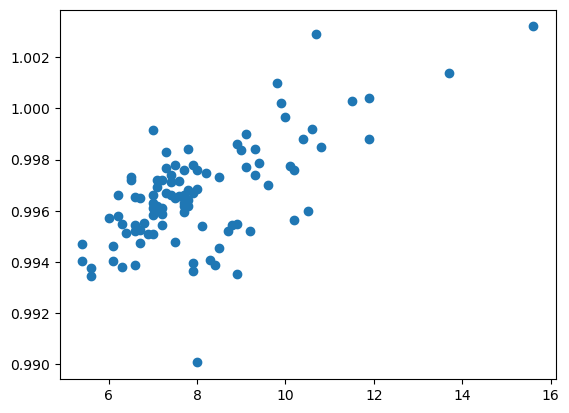

In [9]:
plt.scatter(X,y)

In [10]:
X=X*2*11*11
y=y*11*2

In [11]:
X

,9.1
0,1936.0
1,2202.2
2,2032.8
3,1669.8
4,1863.4
...,...
94,1887.6
95,2468.4
96,1476.2
97,1766.6


In [12]:
y

,0.99523
0,21.78154
1,21.94918
2,21.86492
3,21.89176
4,21.91860
...,...
94,21.91640
95,21.94720
96,21.88208
97,21.96260


In [13]:
X=X/11.0
y=y/2.0

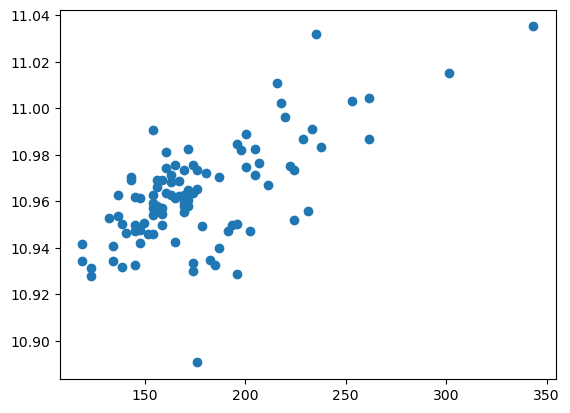

In [14]:
plt.scatter(X,y)

In [10]:
y

,0.99523
0,10.89077
1,10.97459
2,10.93246
3,10.94588
4,10.95930
...,...
94,10.95820
95,10.97360
96,10.94104
97,10.98130


In [15]:
X=X*11
y=y*2

In [12]:
X

,9.1
0,1936.0
1,2202.2
2,2032.8
3,1669.8
4,1863.4
...,...
94,1887.6
95,2468.4
96,1476.2
97,1766.6


In [13]:
y

,0.99523
0,21.78154
1,21.94918
2,21.86492
3,21.89176
4,21.91860
...,...
94,21.91640
95,21.94720
96,21.88208
97,21.96260


In [16]:
theta0 = 1  # Intercept
theta1 = 0.5  # Slope
alpha = 0.5  # Learning rate

In [17]:
def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X


In [18]:
def cost_function(X, y, theta0, theta1):
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

In [20]:
def gradient_descent(X, y, alpha, iterations):
    theta0 = 1
    theta1 = 0.5
    costs = []

    for i in range(iterations):
        predictions = hypothesis(X, theta0, theta1)
        errors = predictions - y

        m = len(X)
        theta0_gradient = (1/m) * np.sum(errors)
        theta1_gradient = (1/m) * np.sum(errors * X)

        theta0 = theta0 - alpha * theta0_gradient
        theta1 = theta1 - alpha * theta1_gradient

        cost = cost_function(X, y, theta0, theta1)
        costs.append(cost)

    return theta0, theta1, costs

In [21]:
iterations = 1000  # Adjust as needed
theta0, theta1, costs = gradient_descent(X, y, alpha, iterations)

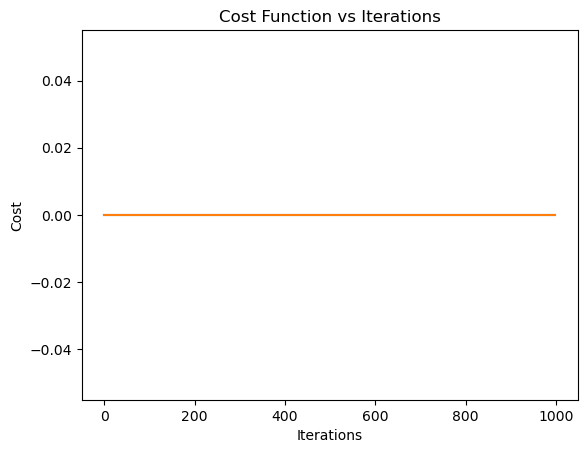

In [22]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.show()


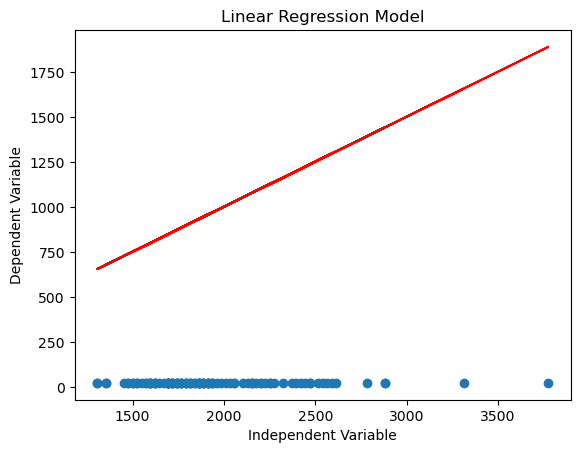

In [23]:
plt.scatter(X, y)
plt.plot(X, hypothesis(X, theta0, theta1), color="red")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression Model")
plt.show()


In [24]:
print("Final Theta0:", theta0)
print("Final Theta1:", theta1)
print("Final Cost:", costs[-1])


Final Theta0: 0.99523    1.0
9.1        1.0
dtype: float64
Final Theta1: 0.99523    0.5
9.1        0.5
dtype: float64
Final Cost: 0.99523    0.0
9.1        0.0
dtype: float64


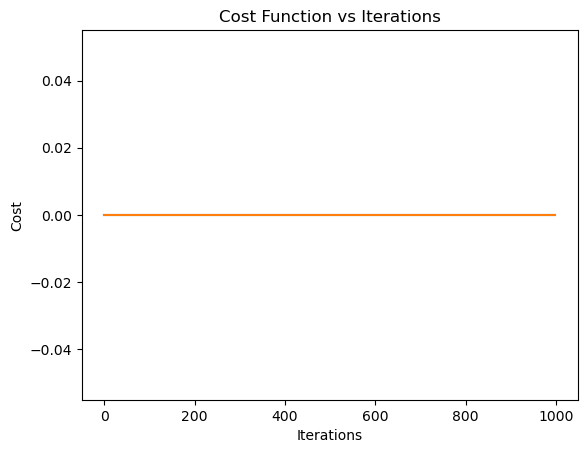

In [25]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.show()


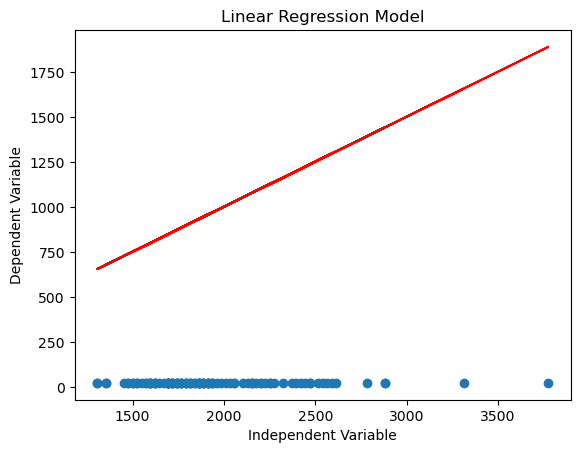

In [26]:
plt.scatter(X, y)
plt.plot(X, hypothesis(X, theta0, theta1), color="red")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression Model")
plt.show()


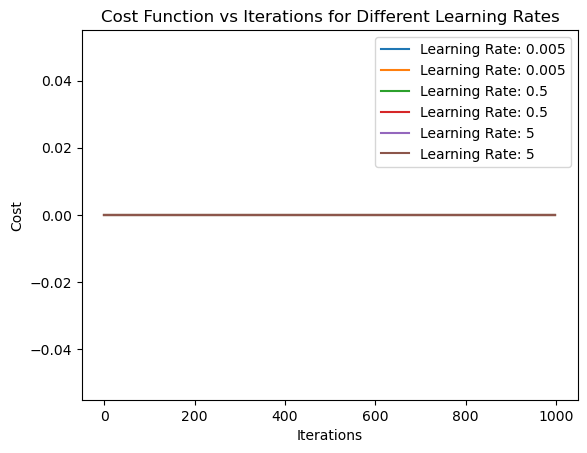

In [27]:
# Test Regression Model with Different Learning Rates
learning_rates = [0.005, 0.5, 5]

for lr in learning_rates:
    # Run gradient descent with the current learning rate
    theta0, theta1, costs = gradient_descent(X, y, lr, iterations)
    
    # Plot the cost function against iterations
    plt.plot(costs, label=f'Learning Rate: {lr}')

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.show()


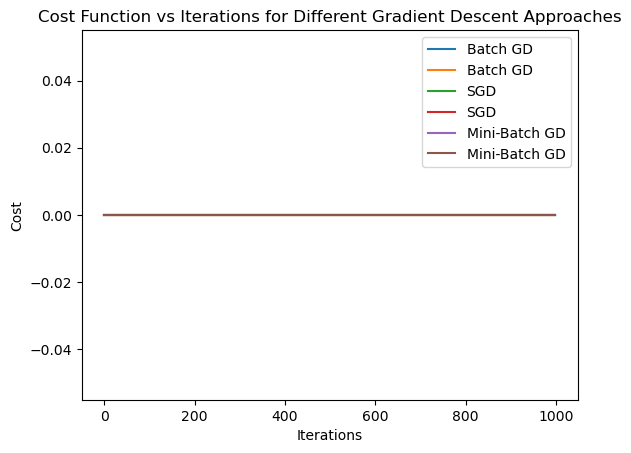

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
X = pd.read_csv("linearX.csv")
y = pd.read_csv("linearY.csv")

# Function for hypothesis
def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

# Function for cost calculation
def cost_function(X, y, theta0, theta1):
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, y, alpha, iterations):
    theta0 = 1
    theta1 = 0.5
    costs = []

    for i in range(iterations):
        predictions = hypothesis(X, theta0, theta1)
        errors = predictions - y

        m = len(X)
        theta0_gradient = (1/m) * np.sum(errors)
        theta1_gradient = (1/m) * np.sum(errors * X)

        theta0 = theta0 - alpha * theta0_gradient
        theta1 = theta1 - alpha * theta1_gradient

        cost = cost_function(X, y, theta0, theta1)
        costs.append(cost)

    return theta0, theta1, costs

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, alpha, iterations):
    theta0 = 1
    theta1 = 0.5
    costs = []

    for i in range(iterations):
        for j in range(len(X)):
            prediction = hypothesis(X.iloc[j], theta0, theta1)
            error = prediction - y.iloc[j]

            theta0_gradient = error
            theta1_gradient = error * X.iloc[j]

            theta0 = theta0 - alpha * theta0_gradient
            theta1 = theta1 - alpha * theta1_gradient

        cost = cost_function(X, y, theta0, theta1)
        costs.append(cost)

    return theta0, theta1, costs

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, alpha, iterations, batch_size=10):
    theta0 = 1
    theta1 = 0.5
    costs = []

    for i in range(iterations):
        for j in range(0, len(X), batch_size):
            X_batch = X.iloc[j:j+batch_size]
            y_batch = y.iloc[j:j+batch_size]

            predictions = hypothesis(X_batch, theta0, theta1)
            errors = predictions - y_batch

            theta0_gradient = (1/batch_size) * np.sum(errors)
            theta1_gradient = (1/batch_size) * np.sum(errors * X_batch)

            theta0 = theta0 - alpha * theta0_gradient
            theta1 = theta1 - alpha * theta1_gradient

        cost = cost_function(X, y, theta0, theta1)
        costs.append(cost)

    return theta0, theta1, costs

# Set common parameters
iterations = 1000
learning_rate = 0.01  # Adjust as needed

# Batch Gradient Descent
theta0_batch, theta1_batch, costs_batch = batch_gradient_descent(X, y, learning_rate, iterations)

# Stochastic Gradient Descent (SGD)
theta0_sgd, theta1_sgd, costs_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)

# Mini-Batch Gradient Descent
theta0_mini_batch, theta1_mini_batch, costs_mini_batch = mini_batch_gradient_descent(X, y, learning_rate, iterations)

# Plot cost function against iterations for all approaches
plt.plot(costs_batch, label='Batch GD')
plt.plot(costs_sgd, label='SGD')
plt.plot(costs_mini_batch, label='Mini-Batch GD')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations for Different Gradient Descent Approaches")
plt.legend()
plt.show()
